# FastAI Example

> FASTAI Example


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp fastai

## Check for all installs and versions

In [ ]:
pip list | grep "torch"

torch                     2.5.1
torchvision               0.20.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
nvcc --version

In [ ]:
pip list | grep "fastai" 

fastai                    2.7.18
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip list | grep "fastbook"

fastbook                  0.0.29
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

## Generate Data Images

In [ ]:
from fastbook import search_images_ddg

In [ ]:
from fastdownload import download_url
from fastai.vision.all import *

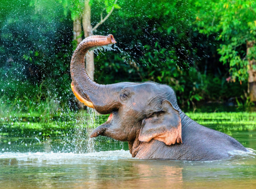

In [ ]:
download_url(search_images_ddg('elephant', max_images=2)[0], 'Data/elephant.jpg', show_progress=False)

im = Image.open('Data/elephant.jpg')
im.to_thumb(256,256)

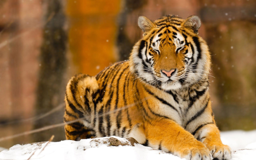

In [ ]:
download_url(search_images_ddg('tiger', max_images=1)[0], 'Data/tiger.jpg', show_progress=False)
Image.open('Data/tiger.jpg').to_thumb(256,256)

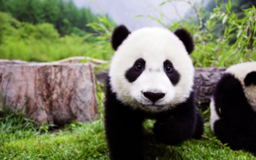

In [ ]:
download_url(search_images_ddg('panda', max_images=2)[0], 'Data/panda.jpg', show_progress=False)
Image.open('Data/panda.jpg').to_thumb(256,256)

In [ ]:
import os
from nbdevAuto import functions

In [ ]:
pip list | grep nbdevAuto

nbdevAuto                 0.3.26
Note: you may need to restart the kernel to use updated packages.


In [ ]:
path = Path('Data/animal_pics') #Replace with folder path

animals = ('chimpanzee', 'elephant', 'giraffe',
                    'kangaroo','lion','panda','rabbit',
                    'rhino', 'tiger', 'wolf')   

functions.create_data_folder(
    path,
    animals,
)

Folder already exists: Data/animal_pics


## Step 2: Train our model

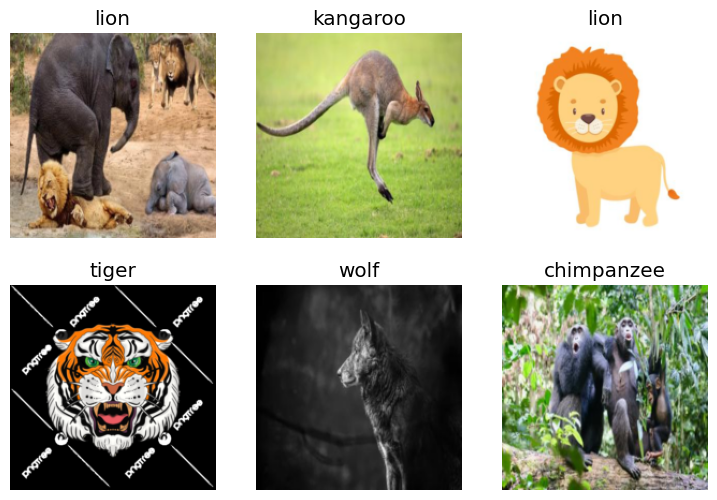

In [ ]:
from fastai.metrics import accuracy, error_rate

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
# Define your metrics
metrics = [accuracy, error_rate]

In [ ]:
learn11 = vision_learner(dls, resnet18, metrics=metrics)
learn11.fine_tune(5)

[W101 22:30:50.769928907 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.879884,0.455274,0.843575,0.156425,00:02


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.552267,0.382098,0.860335,0.139665,00:03
1,0.376326,0.326573,0.891061,0.108939,00:02
2,0.242192,0.306850,0.905028,0.094972,00:02
3,0.160230,0.317596,0.905028,0.094972,00:02
4,0.108631,0.317832,0.913408,0.086592,00:02


## Step 3: Display Results: Confusion Matrix

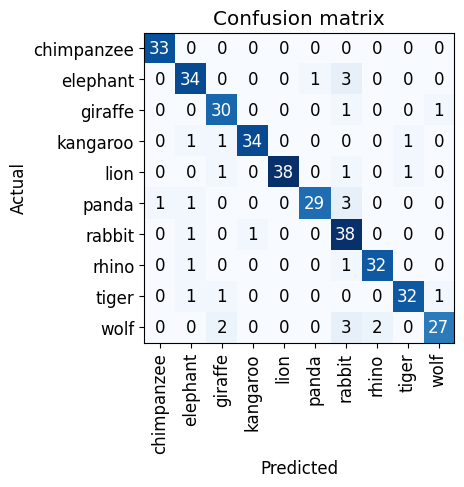

In [ ]:
interp11 = ClassificationInterpretation.from_learner(learn11)
interp11.plot_confusion_matrix()

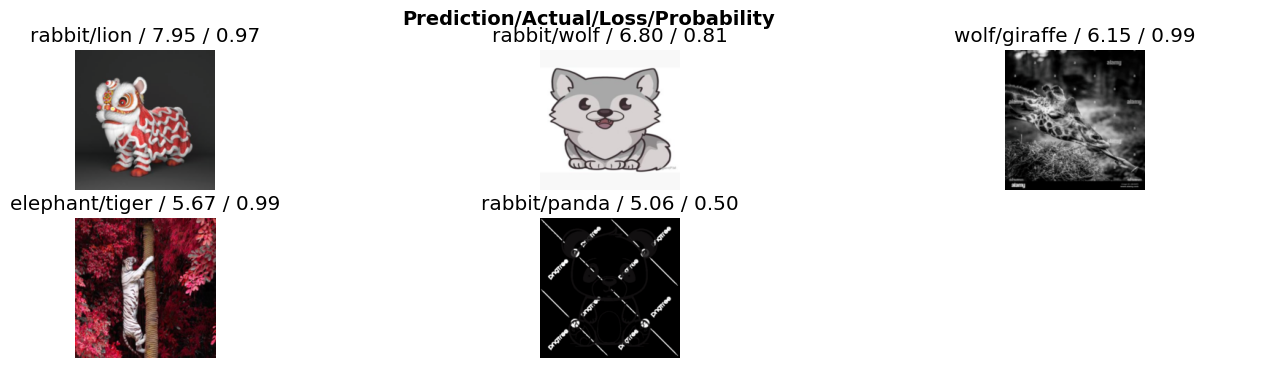

In [ ]:
interp11.plot_top_losses(5,nrows = 2, figsize=(17,4))

## Step 4: Display Results: t-SNE

In [ ]:
from fastai.vision.all import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

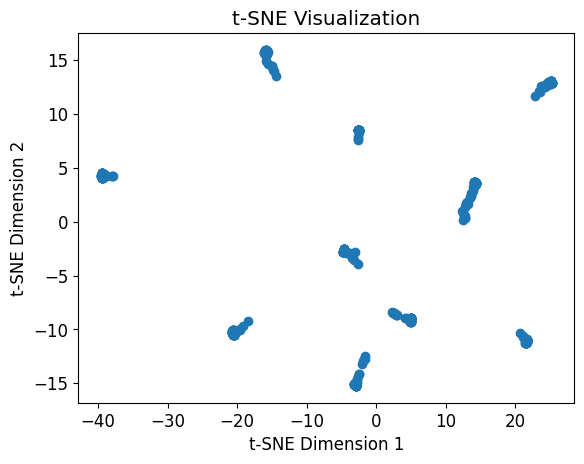

In [ ]:
features, labels = learn11.get_preds(dl=dls.valid)

# Replace 'val_features' with your extracted features
tsne = TSNE(n_components=2)
reduced_features = tsne.fit_transform(features)

# Replace 'labels' with your image labels if available
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

## Step 5: Use our model

This is a: panda with probability: 0.9999746084213257.


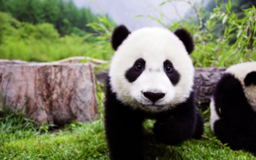

In [ ]:
animal_list =  ('chimpanzee','elephant','giraffe',
                'kangaroo', 'lion','panda', 'rabbit',
                'rhino','tiger','wolf')
image= 'Data/panda.jpg'


is_real,_,probs = learn11.predict(PILImage.create(image))
max_value, max_index = torch.max(probs, dim=0)
print(f"This is a: {animal_list[max_index]} with probability: {max_value}.")

Image.open(image).to_thumb(256,256)

In [ ]:
animal_list =  ('chimpanzee','elephant','giraffe',
                'kangaroo', 'lion','panda', 'rabbit',
                'rhino','tiger','wolf')
for index, value in enumerate(animal_list):
    np.set_printoptions(suppress=True, precision=4)
    print(f"Probability of {value} is :{probs[index]:4f}.")

Probability of chimpanzee is :0.000001.
Probability of elephant is :0.000000.
Probability of giraffe is :0.000000.
Probability of kangaroo is :0.000000.
Probability of lion is :0.000000.
Probability of panda is :0.999975.
Probability of rabbit is :0.000024.
Probability of rhino is :0.000000.
Probability of tiger is :0.000000.
Probability of wolf is :0.000000.
